## Lab Assignment 6 -- Regression
In this lab, you will complete an exercises related to the lecture material on regression. Then, you will compete with your fellow classmates to see who can best predict housing prices. 

**IMPORTANT:** Before submitting, make sure you restart the kernel and run all cells sequentially. After all cells have executed, then save the file for submission.  This is very important for grading. 

In [13]:
# Don't change this line
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
np.random.seed(35)

## Exercise 1 -- Generating & Analyzing Fake Data
In this exercise, we will generate some fake data as we did in the lecture on regression trees. Then, we will use it on a series of regression problems. 

## Exercise 1a -- Generating the Data
Complete the following steps:
1. Define a function called `generate_data` that takes two arguments, an integer `n` and a boolean `square`. `square` should have a default argument of `False`.
2. Generate an array called `X` and set it equal to `np.random.randn((n,1))`. This creates an $n$-vector of [**standard normal random variables**](https://en.wikipedia.org/wiki/Normal_distribution).
3. Turn `X` into an $nx2$ array by concatenating it with an $n$-vector of ones (**Hint**: use `np.ones((n,1))` and `np.concatenate()`). Make sure that the array of ones serves as the first column. 
3. Define an array called `beta` and set it equal to the array [1, 3.14]
4. Define a variable called `epsilon` and set it equal to `np.random.randn(n)*0.3` 
5. Then, using `X`, `beta`, and `epsilon`, create a variable named `y` which is equal to 
    - `np.matmul(X, beta) + epsilon` if square is `False`
    - `np.matmul(X ** 2, beta) + epsilon` if `square` is `True`.
    
6. Your output should return `X`and `y`
7. Test your function in the cell below with `n=100` and no argument for `square`. Save the output to `X100` and `y100` respectively. Afterwards, print `y100[50]`.

Answer the following questions in the Markdown cell below:
1. Is this a bivariate or multivariate linear regression model? Why?
2. What is the purpose of  including this `epsilon`? What aspect of real data are we trying to mimic?

In [14]:
def generate_data (n, square=False):
    X=np.random.randn(n,1)
    X=np.concatenate((np.ones((n,1)),X),axis=1)
    beta=np.array([1,3.14])
    epsilon=np.random.randn(n)*0.3
    if square:
        y=np.matmul(X**2,beta) + epsilon
    else:
        y=np.matmul(X, beta) + epsilon
        
    return X, y
    

In [15]:
# Exercise 1a -- Test function and print
X100, y100 = generate_data(100)
y100[50]

-2.855072207243597

### Reponse to Exercise 1a

## Exercise 1b -- Standard Linear Regression
Using `sklearn`, fit a linear regression model on `y100` and `X100`. When intializing your model, set `fit_intercept` equal to `False` and call your linear model `lr_model_1`. Then, print the estimated coefficients and answer the following question in the Markdown cell below.
- What are the coefficient estimates? What values are they close to? Why does this make sense?



In [19]:
# Exercise 1b -- fit regression
from sklearn import linear_model

lr_model_1 = linear_model.LinearRegression(fit_intercept=False)
lr_model_1.fit(X100, y100)

print(lr_model_1.coef_)

[1.01335663 3.18589237]


### Response to Exercise 1b
The coefficients represent the beta values and they are close to the beta values that were set in the model hence suggesting that the accuracy of the model is high

## Exercise 1c -- Linear Regression with Quadratic Terms
Using `generate_data(100, True)`, create two variables `y100_2` and `X100_2`. Then, repeat the steps from **Exercise 1b** above using `X100_2` and `y100_2` instead of `X_100` and `y_100`.  Call your new model `linear_model_2`.

Answer the following questions in the Markdown cell below:

1. What are the coefficient estimates? Are they similar to the coefficients from **Exercise 1b**? Why or why not?

If your estimates were not similar, create a variable `X100_2_sq` in the third cell below that can be used instead of `X100_2` so that your estimates are similar again. Repeat the same process again but call your `lr_model_3`. Print your new estimated coefficients.

In the markdown cell below, answer the following question:

2. How did you modify `X100_2` to attain similar coefficients? Why did this work? 

In [25]:
# Exercise 1c -- generate variables and repeat regression fit
X100_2, y100_2=generate_data(100, True)

linear_model_2 = linear_model.LinearRegression(fit_intercept=False)
linear_model_2.fit(X100_2, y100_2)

print(linear_model_2.coef_)
print(f'The coefficient estimates are not similar as the values have been squared when square=turue')

[ 4.70194487 -0.3862399 ]
The coefficient estimates are not similar as the values have been squared when square=turue


### Response to Exercise 1c -- Question 1

In [35]:
# Exercise 1c -- modify X100_2 and run new regression
X100_2_sq =X100_2**2
lr_model_3 = linear_model.LinearRegression(fit_intercept=False)
lr_model_3.fit(X100_2_sq, y100_2)
print(lr_model_3.coef_)

[1.04328262 3.1197419 ]


### Response to Exercise 1c -- Quesiton 2

### Exercise 1d -- Unnecessary Quadratic Terms
Now we are going to see what happens when we estimate a model that only has linear terms using both linear and quadratic terms. Complete the following steps:
1. Create an $nx3$ array called `X100_ext` by concatenating `X100` with a column that is equal to the square of elements in the second column. Make sure this new column is the third column. Note that `np.concatenate` requires that both arrays are of the same dimension. You may have to use the method [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
2. Now repeat the steps of **Exercise 1b** with `X100_ext`. Make sure you print the estimated coefficients.

Answer the following questions in the Markdown cell below:
1. Are the first two coefficients different from their respective counterparts in part **Exercise 1b**? Why do you think this is?
2.  Is the third coeffcient close to 0 or large? Why do you think this is?
3. Do you think these estimates are accurate?

In [37]:
# Exercise 1d -- Create X100_ext here
X100_ext = np.concatenate([X100,(X100[:,1]**2).reshape(-1,1)],axis=1)

In [38]:
# Exercise 1d -- Repeat exercise 1b here
lr_model_4 = linear_model.LinearRegression(fit_intercept=False)
lr_model_4.fit(X100_ext, y100)
print(lr_model_4.coef_)

[ 1.02282831  3.18470138 -0.00810062]


### Response to Exercise 1d
1. The first 2 coefficients have no difference this is as they were not edited and a new column was created to include the new coefficient
2. It is close to 0 as the original values are squared, subsuequent squaring of the values will just continue to reduce the coefficient to make it closer to 0
3. Yes

## Exercise 1e -- Regression Plots
Following the notes in the plotting lectures complete the following steps:
1. Using `subplots()` initialize a figure with 4 figures in a $2x2$ grid
2. Plot the following in the indicated location. 
    - **Top-left**  -- a line plot of `lr_model_1` and a scatter plot of the data used to generate `lr_model_1`.
    - **Bottom-left**  -- a line plot of `lr_model_2` and a scatter plot of the data used to generate `lr_model_2`
    - **Bottom-right** -- a line plot of `lr_model_3` and a scatter plot of the data used to generate `lr_model_3`
    - **Top-right** -- a line plot of `lr_model_4` and a scatter plot of the data used to generate `lr_model_4`
    
For the plots above, 
- make your lines red, 
- title your plots (e.g. "Linear Model 1"),
- use `np.linspace(-4,4,200)` as your domain when plotting the lines,
- call `fig.tight_layout()` so your plot is not cluttered

3. Using the `metrics` submodule of `sklearn`, print the `in-sample` mean squared errors of each model using f strings. Your stings should looke like this: "MSE of Linear Model 1 is .3"  
**Hints:** . 
- To plot on the top left axis, you will need to work with `axes.flat[0]` . The remaining axes are indexed by 1, 2, and 3.
- If you choose to used the `.predict()` to plot your lines, keep in mind you need to provide it with the correctly shaped input. 
- When calculating the means within a loop, it may hep to create a list that contains the four linear models.


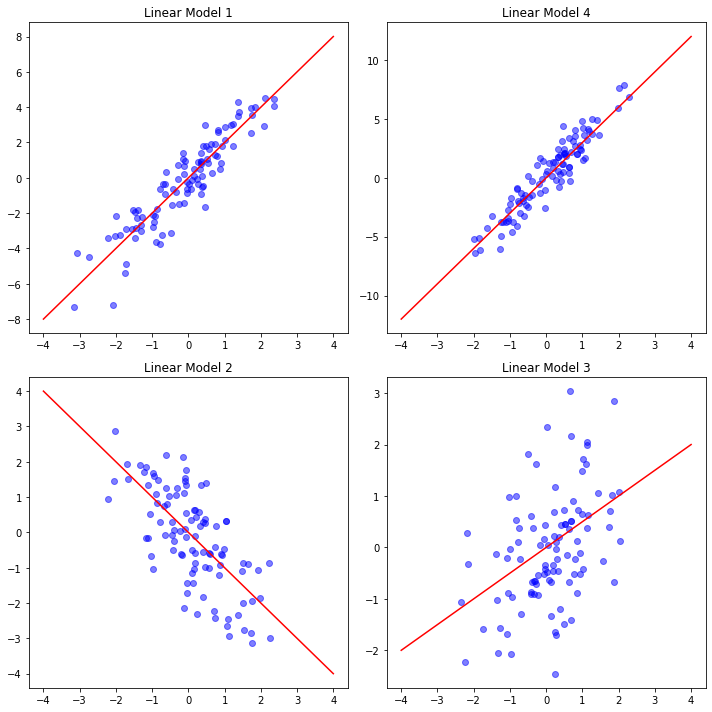

In [43]:
# Exercise 1e -- plots
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Dummy data and models
x_data_1 = np.random.randn(100)
y_data_1 = 2 * x_data_1 + np.random.randn(100)
x_data_2 = np.random.randn(100)
y_data_2 = -1 * x_data_2 + np.random.randn(100)
x_data_3 = np.random.randn(100)
y_data_3 = 0.5 * x_data_3 + np.random.randn(100)
x_data_4 = np.random.randn(100)
y_data_4 = 3 * x_data_4 + np.random.randn(100)

# Linear models
def lr_model(model, x):
    """"
    This UDF is used to plot the various lr_model line plots and their data points in a scatter x line plot
    """
    return model[0] * x + model[1]

lr_model_1 = [2, 0]
lr_model_2 = [-1, 0]
lr_model_3 = [0.5, 0]
lr_model_4 = [3, 0]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# linspace parameter
x_domain = np.linspace(-4, 4, 200)

# Plot for Linear Model 1
axes[0, 0].scatter(x_data_1, y_data_1, label='Data', color='blue', alpha=0.5)
y_pred_line_1 = lr_model(lr_model_1, x_domain)
axes[0, 0].plot(x_domain, y_pred_line_1, label='Model', color='red')
axes[0, 0].set_title("Linear Model 1")
y_pred_1 = lr_model(lr_model_1, x_data_1)

# Plot for Linear Model 2
axes[1, 0].scatter(x_data_2, y_data_2, label='Data', color='blue', alpha=0.5)
y_pred_line_2 = lr_model(lr_model_2, x_domain)
axes[1, 0].plot(x_domain, y_pred_line_2, label='Model', color='red')
axes[1, 0].set_title("Linear Model 2")
y_pred_2 = lr_model(lr_model_2, x_data_2)

# Plot for Linear Model 3
axes[1, 1].scatter(x_data_3, y_data_3, label='Data', color='blue', alpha=0.5)
y_pred_line_3 = lr_model(lr_model_3, x_domain)
axes[1, 1].plot(x_domain, y_pred_line_3, label='Model', color='red')
axes[1, 1].set_title("Linear Model 3")
y_pred_3 = lr_model(lr_model_3, x_data_3)

# Plot for Linear Model 4
axes[0, 1].scatter(x_data_4, y_data_4, label='Data', color='blue', alpha=0.5)
y_pred_line_4 = lr_model(lr_model_4, x_domain)
axes[0, 1].plot(x_domain, y_pred_line_4, label='Model', color='red')
axes[0, 1].set_title("Linear Model 4")
y_pred_4 = lr_model(lr_model_4, x_data_4)


fig.tight_layout()
plt.show()


In [42]:
# Exercise 1e -- mean squared errors
mse_1 = mean_squared_error(y_data_1, y_pred_1)
print(f"MSE of Linear Model 1 is {mse_1:.3f}")
mse_2 = mean_squared_error(y_data_2, y_pred_2)
print(f"MSE of Linear Model 2 is {mse_2:.3f}")
mse_3 = mean_squared_error(y_data_3, y_pred_3)
print(f"MSE of Linear Model 3 is {mse_3:.3f}")
mse_4 = mean_squared_error(y_data_4, y_pred_4)
print(f"MSE of Linear Model 4 is {mse_4:.3f}")

MSE of Linear Model 1 is 1.187
MSE of Linear Model 2 is 0.994
MSE of Linear Model 3 is 1.114
MSE of Linear Model 4 is 1.107


### Exercise 1f -- Functional Misspecification
**Functional Misspecification** is used to describe the situation where the functional form of the regression model we are estimating is not the same as the functional form of the true data generating process. Answer the following question in the markdown cell below:
- Which of the four linear models do you think are well-specified? Which ones are not? Is including extra terms problematic when it comes to being well-specified. What about excluding the terms found in the true data generating process?
- How does misspecification manifest itself in the plots? How about in the mean squared errors? 
- After doing this exercise, do you think it is important to investigate the relationship between variables before determining your regression specification? Why or why not?

### Response to Exercise 1f

### Exercise 1g -- Lasso
Finally, we will run lasso on our fake data. Complete the following steps:
1. Generate `X1000` and `y1000` using `generate_data(1000)`
2. Create an `1000x3` array called `X1000_ext` which is created in a anaglous fashion to `X100_ext`. 
3. Follow the lecture notes to create a standardized version of `X1000_ext` called `X1000_ext_scl`. You will need to import the `preprocessing` submodule of sklearn.
4. Check to make sure your means and variances. You should see that everything looks good except for our intercept has a variance of $0$. You actually do not want to standardize an intercept but we still need it! Replace the first column of  `X1000_ext_scl` with a fresh column of ones using `np.ones(1000)`.
5. Create a dataframe version of `X1000_ext_scl` called `X_lasso_df` and rename the columns to "intercept", "x", and "x_sq" respectively.Then call `X_lasso_df` at the bottom of the cell.
6. Copy and paste the Lasso path code from the lecture notes into the second cell below. Adapt it so it works for `X_lasso_df` and `y1000`.


In the Markdown cell below, answer the following questions:
1. Characterize `X_sq`'s lasso path. Why was this behavior predictable?    Reference linear model 4 or the true DGP in your answer.
2. Without checking, do you think a low or high value for alpha would be chosen by cross validation? To help you answer this question, think about what the true coefficients are and whether or not higher alphas bring the lasso coefficients closer to their true counterparts or farther away. 

In [46]:
# Exercise 1g -- Steps 1-5


In [ ]:
# Exercise 1g -- Step 5 copy code here
